In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
Theta_0 = np.array([13.55037486116183, -13.938877070529985,0.,0.])
tt = [0.0199009793340327*2.65860467535e+15*mt.C.s.express(mt.C.Myr)*ti for ti in range(11)]
oocct = np.load('/fs/nas14/other0/cbenitez/evolsOC/MCMCruns/oocct_p1p2p3p4p5p10.npy')

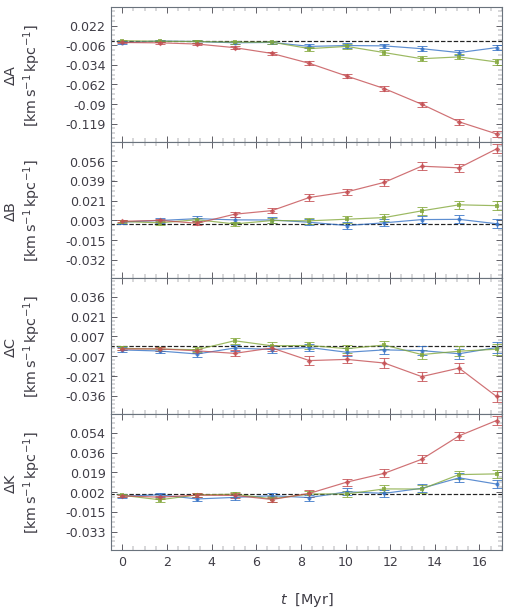

In [10]:
ylabs = ["A", "B", "C", "K"]
irc1 = 3
irc2 = 4
irc3 = 5
fig, axes = plt.subplots(4, 1,figsize=(7,10),sharex=True)
j=0
for i in range(4):
    ymax = max(.05,max([oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)])*1.1)
    ymin = min(-.05,min([oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)])*1.1)
    axes[i].set_yticks([ymin+(ymax-ymin)/7.*e for e in range(7)])
    axes[i].set_yticklabels([np.round(ymin+(ymax-ymin)/7.*e,decimals=3) for e in range(7)])
    axes[i].set_ylim(ymin+.001,ymax-.001)
    axes[i].set_xlim(-.5,17)
    axes[i].set_ylabel("$\Delta$"+ylabs[i+j*2]+" \n[km$\,$s$^{-1}$$\,$kpc$^{-1}$]",labelpad=22-j*11)
    axes[i].hlines(0,-2,17,linestyle="--")
    axes[i].set_xlabel("$t$  [Myr]",labelpad=22-j*11)
    axes[i].errorbar(tt,[oocct[irc1][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc1][ti].std[i+2*j] for ti in range(11)],marker="o",ms=4,alpha=.8,capsize=5,capthick=1)
    axes[i].errorbar(tt,[oocct[irc2][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc2][ti].std[i+2*j] for ti in range(11)],marker="s",ms=4,alpha=.8,capsize=5,capthick=1)
    axes[i].errorbar(tt,[oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc3][ti].std[i+2*j] for ti in range(11)],marker="D",ms=4,alpha=.8,capsize=5,capthick=1)
    axes[i].tick_params(which='major',direction='in',right=True,top=True,length=6)
    axes[i].minorticks_on()
    axes[i].tick_params(which='minor',direction='in',right=True,top=True,length=4)
plt.subplots_adjust(hspace=0,wspace=.35)
plt.savefig("desviaciones Theta.pdf", format='pdf',bbox_inches='tight')

